Original dataset:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Cleaned dataset:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


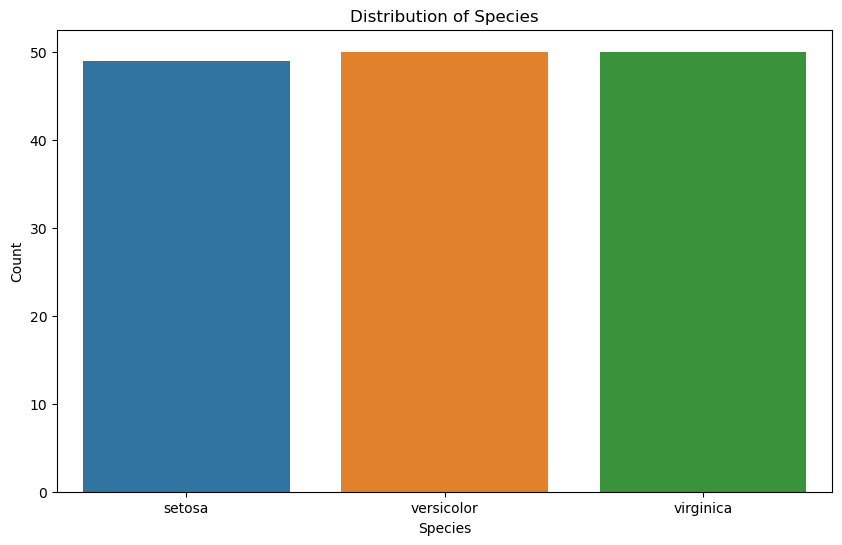

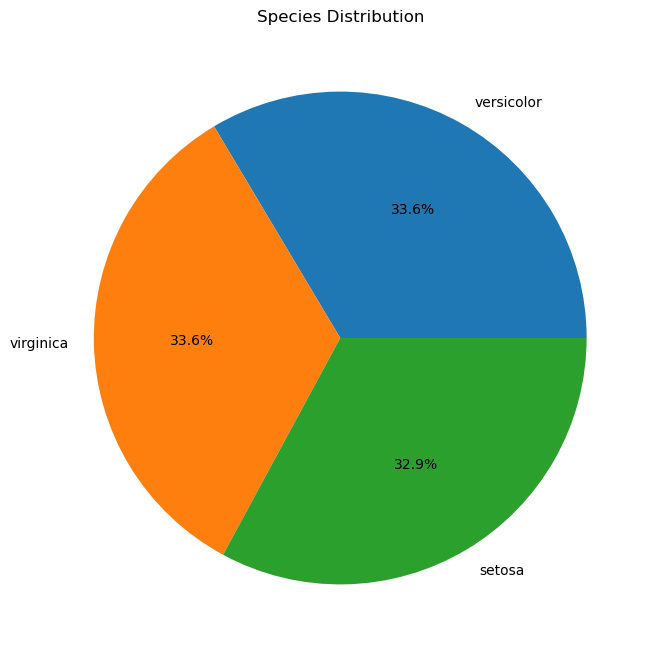

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load sample dataset (iris dataset)
iris_data = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')

# Display first few rows of the dataset
print("Original dataset:")
print(iris_data.head())

# Outlier detection using Z-score
z_scores = np.abs(stats.zscore(iris_data.select_dtypes(include=np.number)))
threshold = 3
outlier_rows, outlier_cols = np.where(z_scores > threshold)

# Remove outliers
cleaned_data = iris_data.drop(outlier_rows)

# Identify numeric columns
numeric_columns = cleaned_data.select_dtypes(include=np.number).columns

# Fill missing values with mean for numeric columns
cleaned_data[numeric_columns] = cleaned_data[numeric_columns].fillna(cleaned_data[numeric_columns].mean())

# Display cleaned dataset
print("\nCleaned dataset:")
print(cleaned_data.head())

# Bar graph
plt.figure(figsize=(10, 6))
sns.countplot(x='species', data=cleaned_data)
plt.title('Distribution of Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

# Pie chart
plt.figure(figsize=(8, 8))
cleaned_data['species'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Species Distribution')
plt.ylabel('')
plt.show()

# Save cleaned data
cleaned_data.to_csv('cleaned_iris_data.csv', index=False)
